In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
import openpyxl

In [3]:
data = pd.read_csv("dataset/Leitos_2016.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83086 entries, 0 to 83085
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COMP                     83086 non-null  int64  
 1   REGIAO                   83086 non-null  object 
 2   UF                       83086 non-null  object 
 3   MUNICIPIO                83086 non-null  object 
 4   MOTIVO DESABILITACAO     0 non-null      float64
 5   CNES                     83086 non-null  int64  
 6   NOME ESTABELECIMENTO     83086 non-null  object 
 7   RAZAO SOCIAL             83086 non-null  object 
 8   TP_GESTAO                83086 non-null  object 
 9   CO_TIPO_UNIDADE          83086 non-null  int64  
 10  DS_TIPO_UNIDADE          83086 non-null  object 
 11  NATUREZA_JURIDICA        83086 non-null  int64  
 12  DESC_NATUREZA_JURIDICA   83086 non-null  object 
 13  NO_LOGRADOURO            83086 non-null  object 
 14  NU_ENDERECO           

#### Avaliação da parte numérica

In [5]:
columns_to_select = ['LEITOS EXISTENTE', 'LEITOS SUS', 'UTI TOTAL - EXIST',
                     'UTI TOTAL - SUS', 'UTI ADULTO - EXIST', 'UTI ADULTO - SUS',
                     'UTI PEDIATRICO - EXIST', 'UTI PEDIATRICO - SUS', 'UTI NEONATAL - EXIST',
                     'UTI NEONATAL - SUS', 'UTI QUEIMADO - EXIST', 'UTI QUEIMADO - SUS',
                     'UTI CORONARIANA - EXIST', 'UTI CORONARIANA - SUS']

In [6]:
data_numbers = data[columns_to_select]

In [57]:
descricao = data_numbers.describe()

In [58]:
mediana = data_numbers.median()

##### correlação linear

In [59]:
correlacao = data_numbers.corr(method="pearson")

c:\Users\Clara Aquino\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


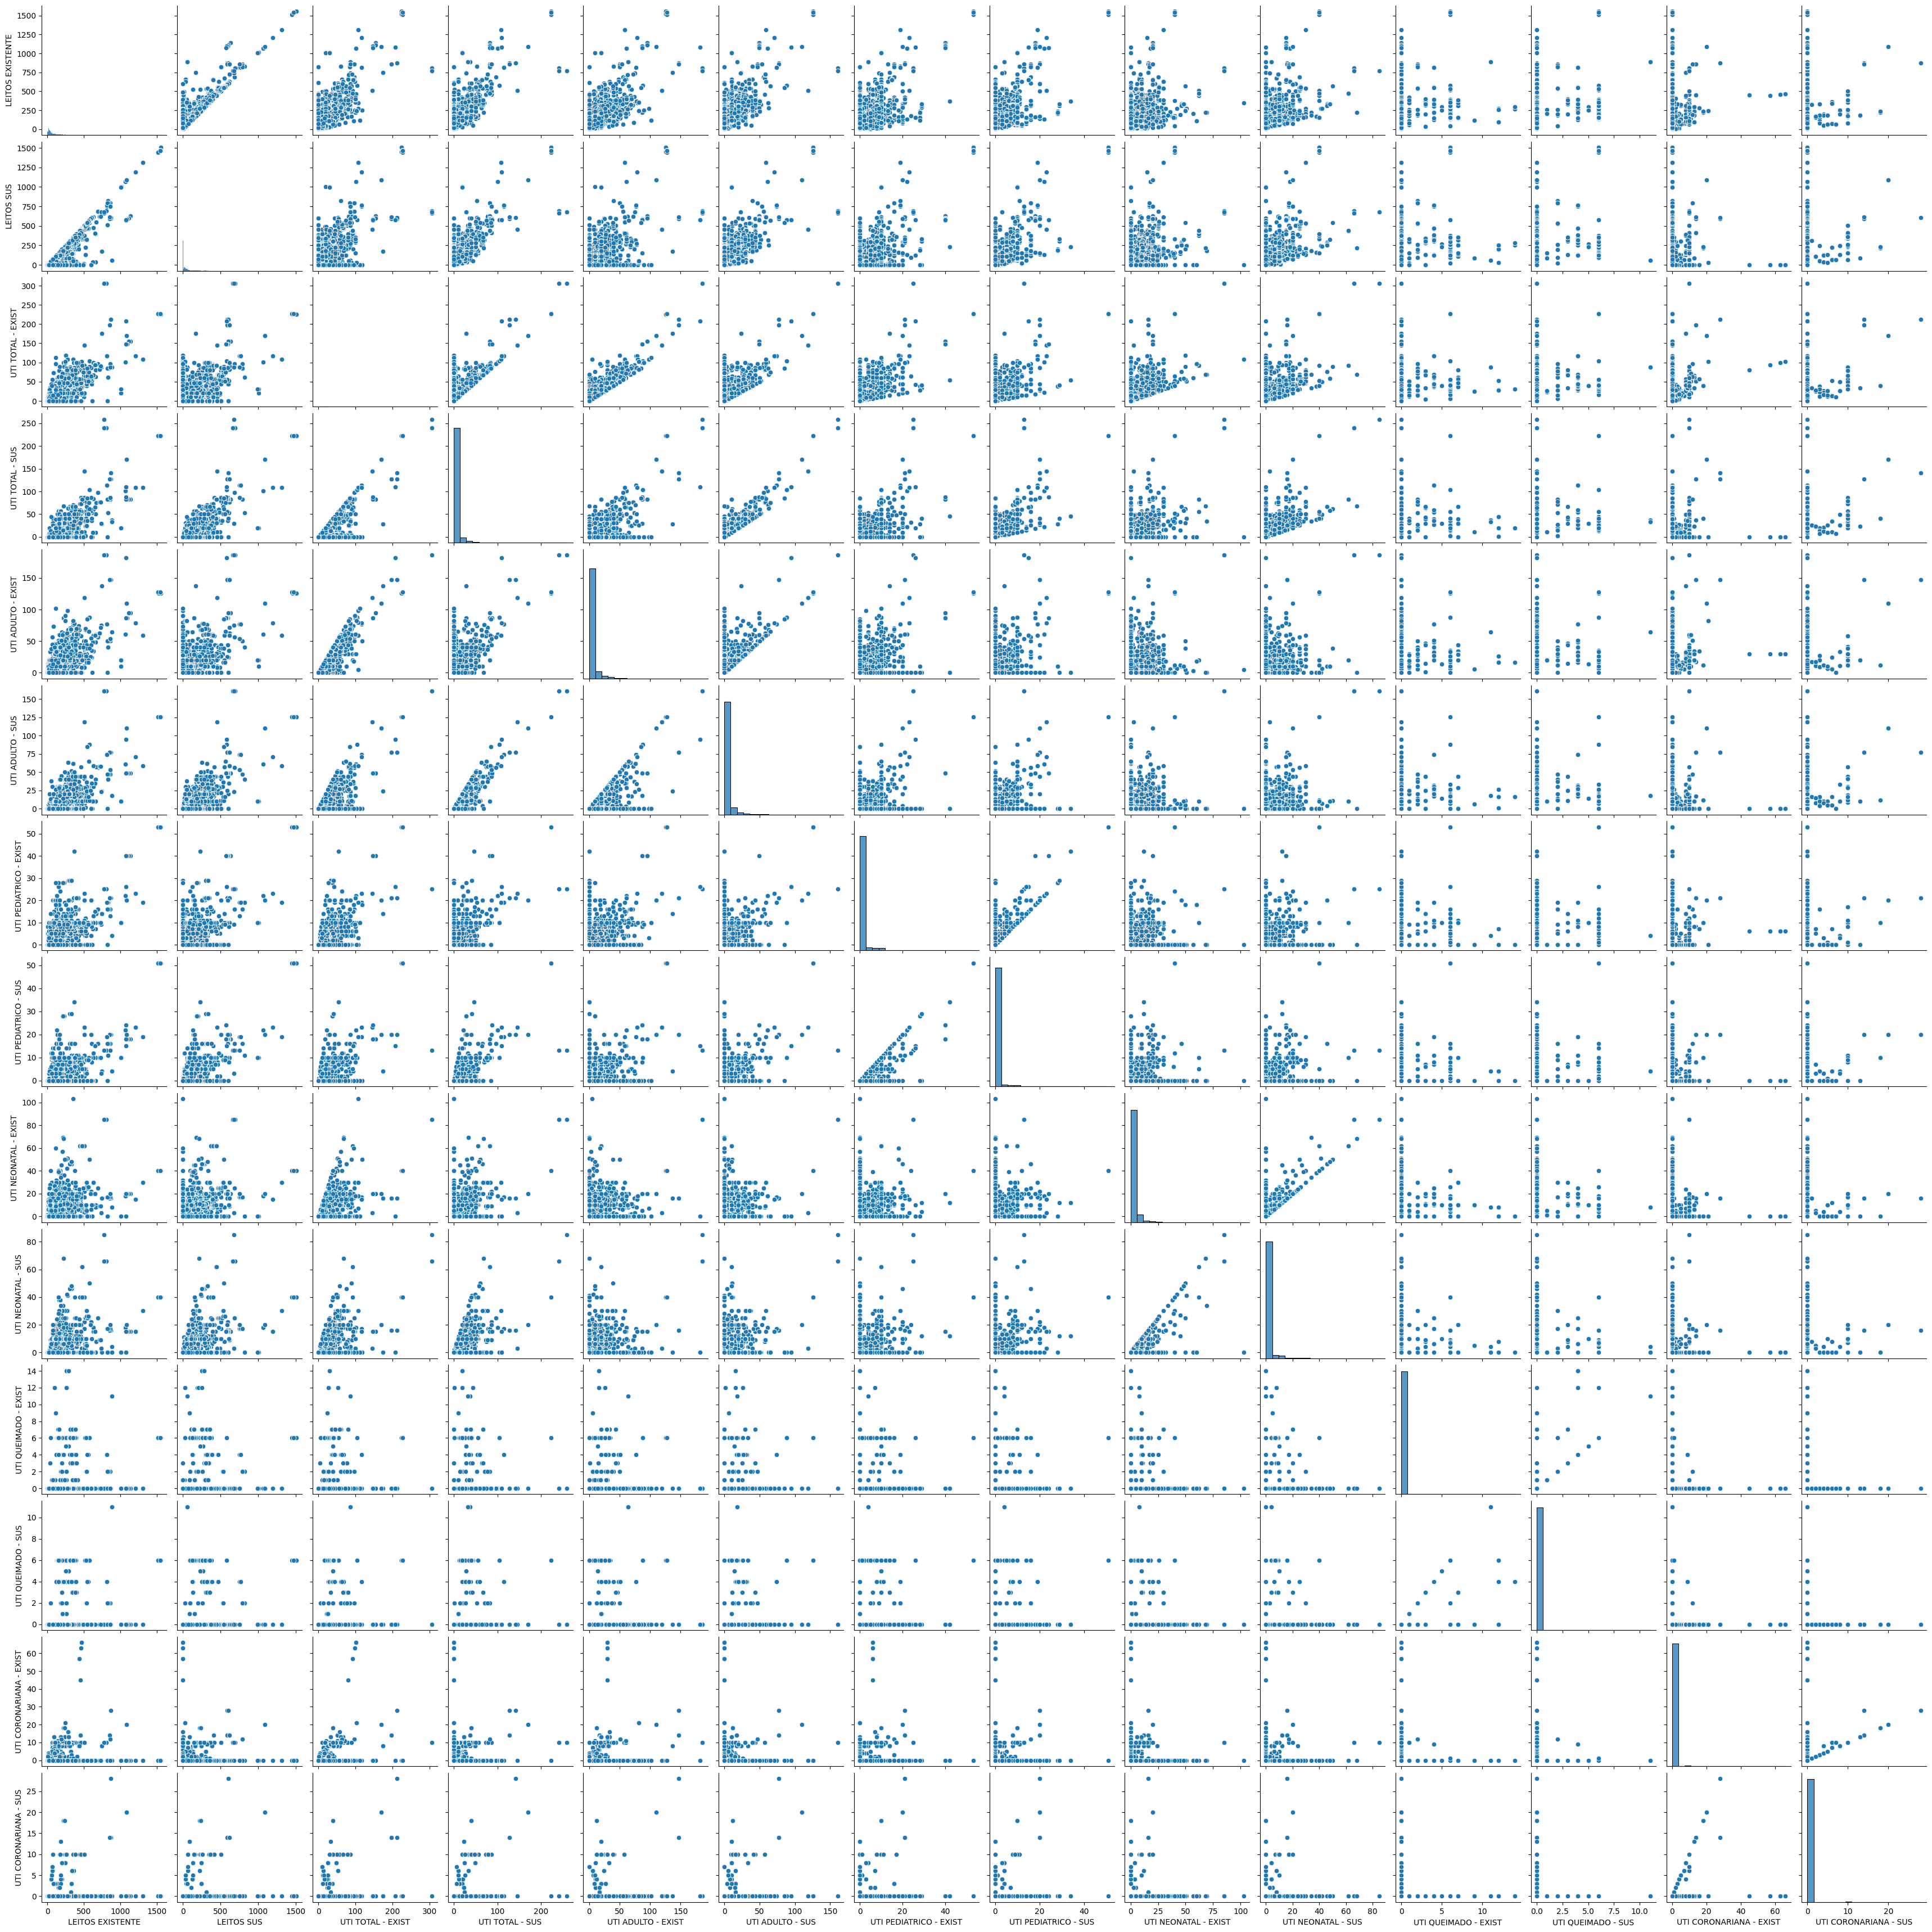

In [10]:
sns.pairplot(data_numbers)

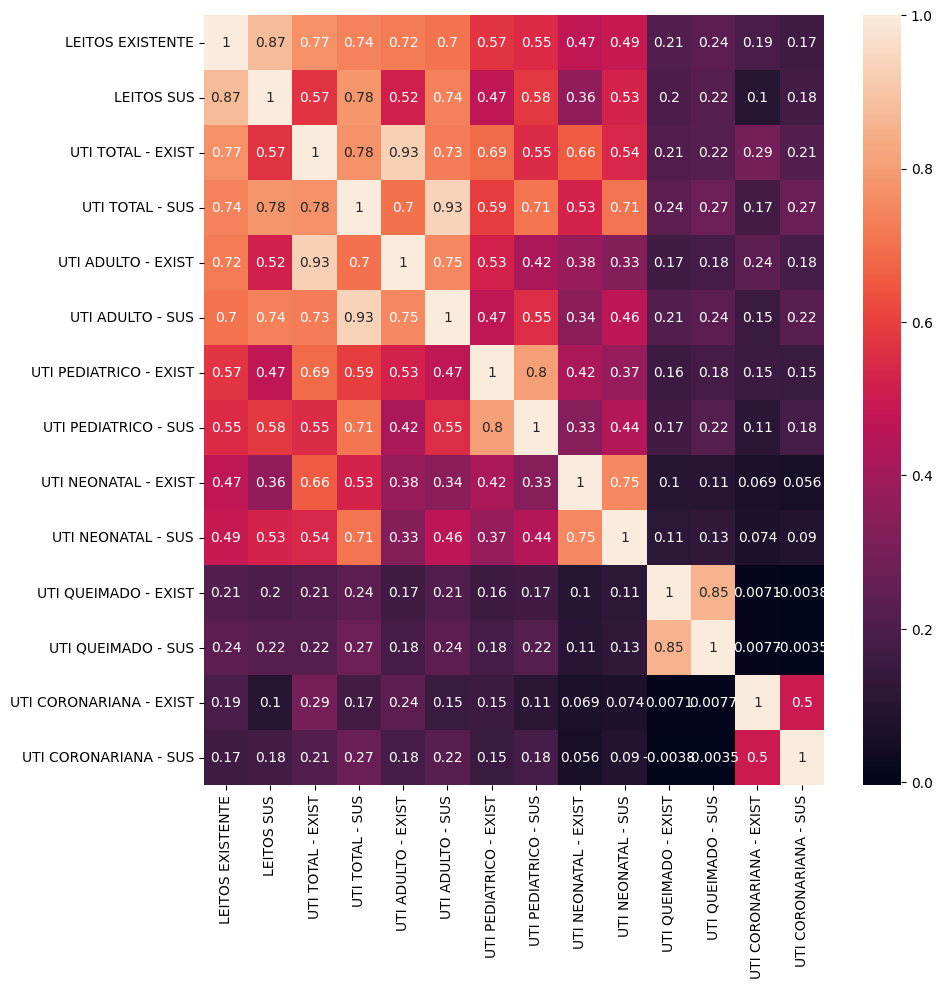

In [11]:
plt.figure(figsize = (10,10))
sns.heatmap(data_numbers.corr(method="pearson"), annot=True)
plt.show()

##### regressão linear

In [12]:
X = data_numbers[['LEITOS EXISTENTE']]
y = data_numbers["LEITOS SUS"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)

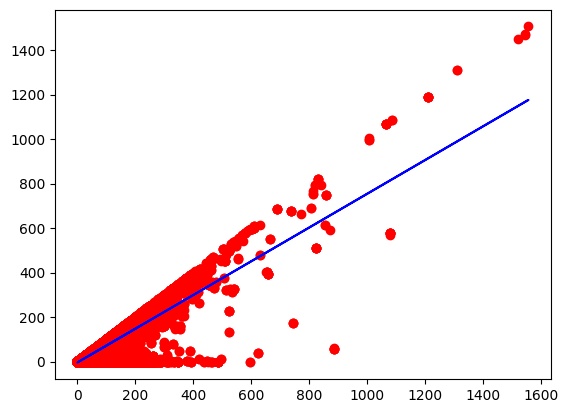

In [16]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue') 
plt.show()

##### salvar os dados

In [61]:
caminho_arquivo_descricao = 'C:\\Users\\Clara Aquino\\Documents\\Projects VS Code\\Projeto de dados\\Leitos de hospitais\\planilhas\\2016\\descricao.xlsx'
descricao.to_excel(caminho_arquivo_descricao, index=True)
caminho_arquivo_correlacao = 'C:\\Users\\Clara Aquino\\Documents\\Projects VS Code\\Projeto de dados\\Leitos de hospitais\\planilhas\\2016\\correlacao.xlsx'
correlacao.to_excel(caminho_arquivo_correlacao, index=True)
caminho_arquivo_mediana = 'C:\\Users\\Clara Aquino\\Documents\\Projects VS Code\\Projeto de dados\\Leitos de hospitais\\planilhas\\2016\\mediana.xlsx'
mediana.to_excel(caminho_arquivo_mediana, index=True)

#### Leitos

##### Leitos existentes

In [17]:
leitos_existentes = data["LEITOS EXISTENTE"].sum()
leitos_existentes

5781595

##### Leitos do SUS

In [18]:
leitos_sus = data["LEITOS SUS"].sum() 
leitos_sus

3997126

##### Leitos que não são do sus:

In [19]:
leitos_nsus = leitos_existentes - leitos_sus
leitos_nsus

1784469

#### UTI Adulto

##### UTI Adulto geral

In [20]:
uti_adulto_existente = data["UTI ADULTO - EXIST"].sum()
uti_adulto_existente

325623

##### UTI Adulto SUS

In [21]:
uti_adulto_sus = data["UTI ADULTO - SUS"].sum()
uti_adulto_sus

157209

##### UTI Adulto não SUS

In [22]:
uti_nao_sus = uti_adulto_existente - uti_adulto_sus
uti_nao_sus

168414

#### UTI Pediátrico 

##### UTI Pedriático geral

In [23]:
uti_pedriatico_existente = data["UTI PEDIATRICO - EXIST"].sum()
uti_pedriatico_existente

52511

##### UTI Pedriático SUS

In [24]:
uti_pedriatico_sus = data["UTI PEDIATRICO - SUS"].sum()
uti_pedriatico_sus

28045

In [25]:
uti_pedriatico_nao_sus = uti_pedriatico_existente - uti_pedriatico_sus
uti_pedriatico_nao_sus

24466

#### UTI Neonatal

##### UTI Neonatal geral

In [26]:
uti_neonatal_existente = data["UTI NEONATAL - EXIST"].sum()
uti_neonatal_existente

104124

##### UTI Neonatal SUS

In [27]:
uti_neonatal_sus = data["UTI NEONATAL - SUS"].sum()
uti_neonatal_sus

53950

##### UTI Neonatal não SUS

In [28]:
uti_neonatal_nao_sus = uti_neonatal_existente - uti_neonatal_sus
uti_neonatal_nao_sus

50174

#### Número de leitos por região

In [29]:
data["REGIAO"].unique()

array(['NORDESTE', 'NORTE', 'SUDESTE', 'CENTRO-OESTE', 'SUL'],
      dtype=object)

##### Centro-Oeste

In [30]:
data_co = data[data["REGIAO"] == "CENTRO-OESTE"]

In [31]:
leitos_co_existente = data_co["LEITOS EXISTENTE"].sum()
leitos_co_existente

481804

In [32]:
leitos_co_sus = data_co["LEITOS SUS"].sum()
leitos_co_sus

308350

In [33]:
leitos_co_nao_sus = leitos_co_existente - leitos_co_sus
leitos_co_nao_sus

173454

##### Nordeste

In [34]:
data_ne = data[data["REGIAO"] == "NORDESTE"]

In [35]:
leitos_ne_existente = data_ne["LEITOS EXISTENTE"].sum()
leitos_ne_existente

1466495

In [36]:
leitos_ne_sus = data_ne["LEITOS SUS"].sum()
leitos_ne_sus

1189115

In [37]:
leitos_ne_nao_sus = leitos_ne_existente - leitos_ne_sus
leitos_ne_nao_sus

277380

##### Norte

In [38]:
data_no = data[data["REGIAO"] == "NORTE"]

In [39]:
leitos_no_existente = data_no["LEITOS EXISTENTE"].sum()
leitos_no_existente

413776

In [40]:
leitos_no_sus = data_no["LEITOS SUS"].sum()
leitos_no_sus

313769

In [41]:
leitos_no_nao_sus = leitos_no_existente - leitos_no_sus
leitos_no_nao_sus

100007

##### Sudeste

In [42]:
data_sd = data[data["REGIAO"] == "SUDESTE"]

In [43]:
leitos_sd_existente = data_sd["LEITOS EXISTENTE"].sum()
leitos_sd_existente

2455963

In [44]:
leitos_sd_sus = data_sd["LEITOS SUS"].sum()
leitos_sd_sus

1509028

In [45]:
leitos_sd_nao_sus = leitos_sd_existente - leitos_sd_sus
leitos_sd_nao_sus

946935

##### Sul

In [46]:
data_sl = data[data["REGIAO"] == "SUL"]

In [47]:
leitos_sl_existente = data_sl["LEITOS EXISTENTE"].sum()
leitos_sl_existente

963557

In [48]:
leitos_sl_sus = data_sl["LEITOS SUS"].sum()
leitos_sl_sus

676864

In [49]:
leitos_sl_nao_sus = leitos_sl_existente - leitos_sl_sus
leitos_sl_nao_sus

286693

#### Gráfico do número de leitos por estado

In [50]:
import plotly.express as px
import json
from urllib.request import urlopen

In [51]:
# importando o json com as delimitações 

with urlopen('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson') as response:
 Brazil = json.load(response)

In [52]:
# indicando em na sigla do estado que vai bater os dados

state_id_map = {}
for feature in Brazil ['features']:
 feature['id'] = feature['properties']['sigla']
 state_id_map[feature['properties']['name']] = feature['id']

In [53]:
# pegando os dados de leitos existente de cada estado 

pe = data[data['UF'] == "PE"]['LEITOS EXISTENTE'].sum()
se = data[data['UF'] == "SE"]['LEITOS EXISTENTE'].sum()
ba = data[data['UF'] == "BA"]['LEITOS EXISTENTE'].sum()
pa = data[data['UF'] == "PA"]['LEITOS EXISTENTE'].sum()
sp = data[data['UF'] == "SP"]['LEITOS EXISTENTE'].sum()
ms = data[data['UF'] == "MS"]['LEITOS EXISTENTE'].sum()
df = data[data['UF'] == "DF"]['LEITOS EXISTENTE'].sum()
es = data[data['UF'] == "ES"]['LEITOS EXISTENTE'].sum()
rj = data[data['UF'] == "RJ"]['LEITOS EXISTENTE'].sum()
pr = data[data['UF'] == "PR"]['LEITOS EXISTENTE'].sum()
sc = data[data['UF'] == "SC"]['LEITOS EXISTENTE'].sum()
go = data[data['UF'] == "GO"]['LEITOS EXISTENTE'].sum()
al = data[data['UF'] == "AL"]['LEITOS EXISTENTE'].sum()
mg = data[data['UF'] == "MG"]['LEITOS EXISTENTE'].sum()
mt = data[data['UF'] == "MT"]['LEITOS EXISTENTE'].sum()
pb = data[data['UF'] == "PB"]['LEITOS EXISTENTE'].sum()
ce = data[data['UF'] == "CE"]['LEITOS EXISTENTE'].sum()
rs = data[data['UF'] == "RS"]['LEITOS EXISTENTE'].sum()
ro = data[data['UF'] == "RO"]['LEITOS EXISTENTE'].sum()
rn = data[data['UF'] == "RN"]['LEITOS EXISTENTE'].sum()
am = data[data['UF'] == "AM"]['LEITOS EXISTENTE'].sum()
ap = data[data['UF'] == "AP"]['LEITOS EXISTENTE'].sum()
ma = data[data['UF'] == "MA"]['LEITOS EXISTENTE'].sum()
rr = data[data['UF'] == "RR"]['LEITOS EXISTENTE'].sum()
pi = data[data['UF'] == "PI"]['LEITOS EXISTENTE'].sum()
ac = data[data['UF'] == "AC"]['LEITOS EXISTENTE'].sum()
to = data[data['UF'] == "TO"]['LEITOS EXISTENTE'].sum()

In [54]:
# criando um dataset com a sigla dos estado associada a quantidade de leitos existentes

dt = {'UF': ['PE', 'SE', 'BA', 'PA', 'SP', 'MS', 'DF', 'ES', 'RJ', 'PR', 'SC',
       'GO', 'AL', 'MG', 'MT', 'PB', 'CE', 'RS', 'RO', 'RN', 'AM', 'AP',
       'MA', 'RR', 'PI', 'AC', 'TO'],
      'LEITOS EXISTENTES': [pe, se, ba, pa, sp, ms, df, es, rj, pr, sc, go, al, 
                           mg, mt, pb, ce, rs, ro, rn, am, ap, ma, rr, pi, 
                           ac, to]}
df = pd.DataFrame(dt)

In [55]:
# plotando o gráfico

fig = px.choropleth(
 dt,
 locations = 'UF', # definindo os limites no mapa
 geojson = Brazil, # definindo as informações
 color = "LEITOS EXISTENTES", # definisção de cor através dos dados
 hover_name = 'UF', # informação da caixa
 hover_data =['LEITOS EXISTENTES'],
 title = "Leitos existente por estado no Brasil", # título do mapa
 color_continuous_scale='tropic'
)
fig.update_geos(fitbounds = "locations", visible = False)  # mostrar só o Brasil

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}) # tamanho
fig.show()